# LOGISTIC REGRESSION

In [153]:
#%pip install pandas
#%pip install matplotlib
#%pip install seaborn
#%pip install scikit-learn
#%pip install tensorflow
#%pip install numpy
%pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: C:\Users\sabri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## LIBRARY

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import sklearn.linear_model as lm
from sklearn import metrics
from sklearn import feature_selection
import joblib


## DATA

In [3]:
df1 = pd.read_csv('calonpembeli_ch5.csv');

In [4]:
df1.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [5]:
df1.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,500.500000,43.532000,1.469000,0.481000,0.95200,270.09000,0.633000
std,288.819436,12.672078,1.073402,0.499889,0.80146,95.23681,0.482228
min,1.000000,24.000000,0.000000,0.000000,0.00000,95.00000,0.000000
25%,250.750000,33.000000,1.000000,0.000000,0.00000,187.00000,0.000000
50%,500.500000,43.000000,1.000000,0.000000,1.00000,258.50000,1.000000
75%,750.250000,53.000000,2.000000,1.000000,2.00000,352.25000,1.000000
max,1000.000000,164.000000,3.000000,1.000000,4.00000,490.00000,1.000000


In [6]:
df1.shape

(1000, 7)

## PREPROCESSING DATA

#### Data Cleaning

In [7]:
df1.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,500.500000,43.532000,1.469000,0.481000,0.95200,270.09000,0.633000
std,288.819436,12.672078,1.073402,0.499889,0.80146,95.23681,0.482228
min,1.000000,24.000000,0.000000,0.000000,0.00000,95.00000,0.000000
25%,250.750000,33.000000,1.000000,0.000000,0.00000,187.00000,0.000000
50%,500.500000,43.000000,1.000000,0.000000,1.00000,258.50000,1.000000
75%,750.250000,53.000000,2.000000,1.000000,2.00000,352.25000,1.000000
max,1000.000000,164.000000,3.000000,1.000000,4.00000,490.00000,1.000000


##### Handling Missing Values

In [8]:
df1.isnull().sum()

ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64

In [9]:
df1.duplicated().sum()

0

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


Dapat dilihat bahwa terdapat usia maksimal adalah 164, lebih baik tidak diikutkan dalam pembuatan model

Mengambil data hanya usia kurang dari atau sama dengan 100

In [11]:
df2 = df1[df1['Usia'] <= 100]
df2.shape

(998, 7)

##### Handling Outliers

In [12]:
df3 = df2.copy()
df3.shape

(998, 7)

(987, 7)

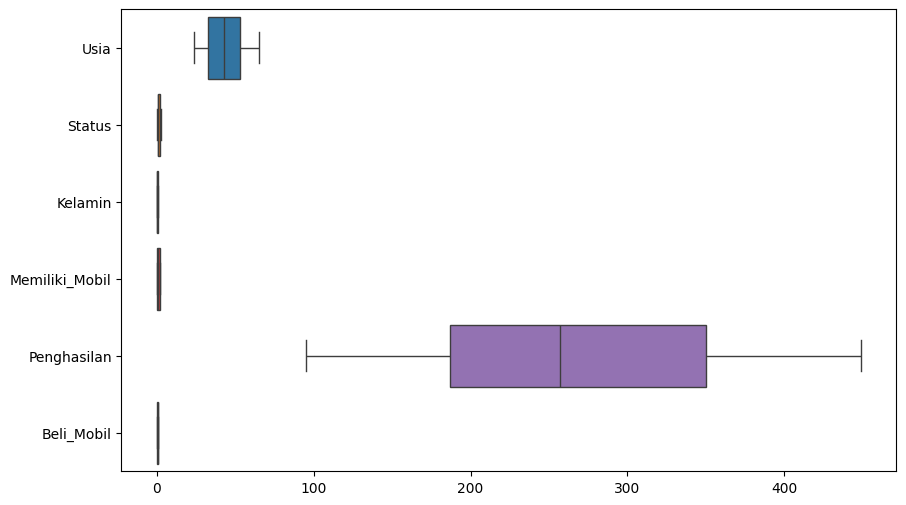

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df3.iloc[:, 1:10], orient='h')
df3.shape

Dapat dilihat bahawa kolom 'Memiliki_Mobil' dan 'Penghasilan' memiliki outlier

In [14]:
df3[df3['Penghasilan'] >= 450]

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
78,79,54,2,1,3,450,0
135,136,55,3,0,3,490,1
156,157,62,2,0,1,460,1
226,227,50,2,1,2,450,1
241,242,59,3,0,2,450,1
342,343,38,2,0,2,450,1
738,739,43,0,0,0,450,1


In [15]:
df3[df3['Memiliki_Mobil'] >= 3]

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
67,68,61,2,0,4,390,1
72,73,44,2,0,3,322,1
78,79,54,2,1,3,450,0
135,136,55,3,0,3,490,1
183,184,54,2,0,3,400,1
242,243,54,2,1,3,420,1


In [16]:
df3 = df3[df3['Penghasilan'] < 450]
df3 = df3[df3['Memiliki_Mobil'] < 3]
df3.shape

(987, 7)

Data sudah dianggap clear dan disimpan ke variabel df

In [17]:
df = df3.copy()

## EDA (EXPLORATORY DATA ANALYSIS)

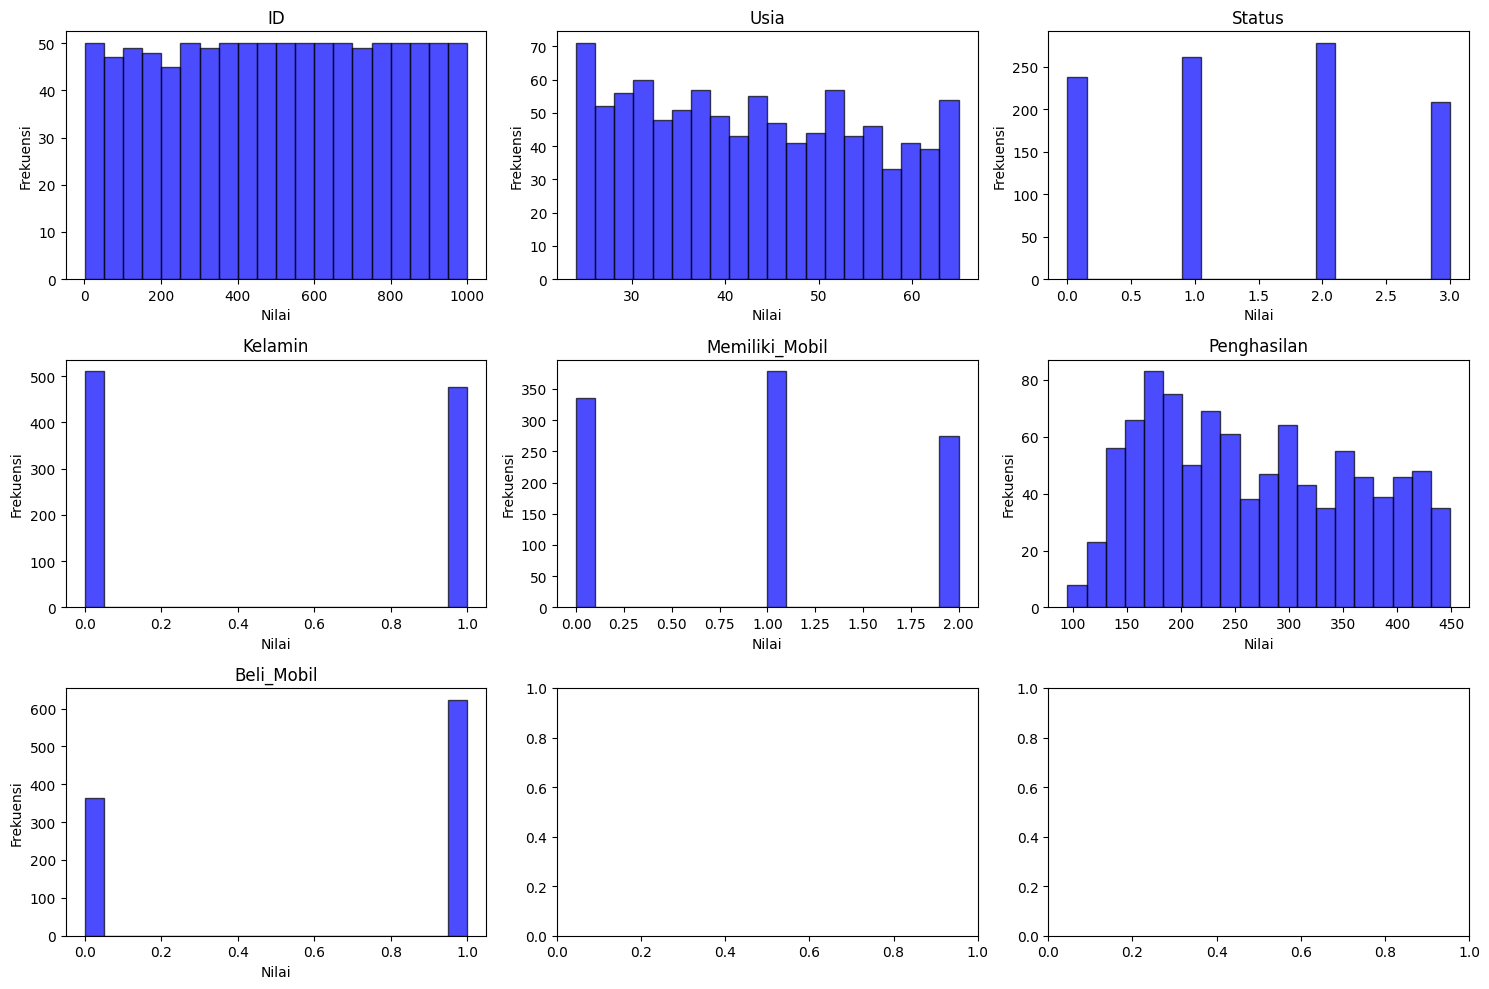

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Menyusun histogram untuk setiap kolom dalam subplot
for i, col in enumerate(df.columns):
    ax = axes.flatten()[i]
    ax.hist(df[col], bins=20, color='blue', edgecolor='black', alpha=0.7)
    ax.set_title(col)
    ax.set_xlabel('Nilai')
    ax.set_ylabel('Frekuensi')

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()

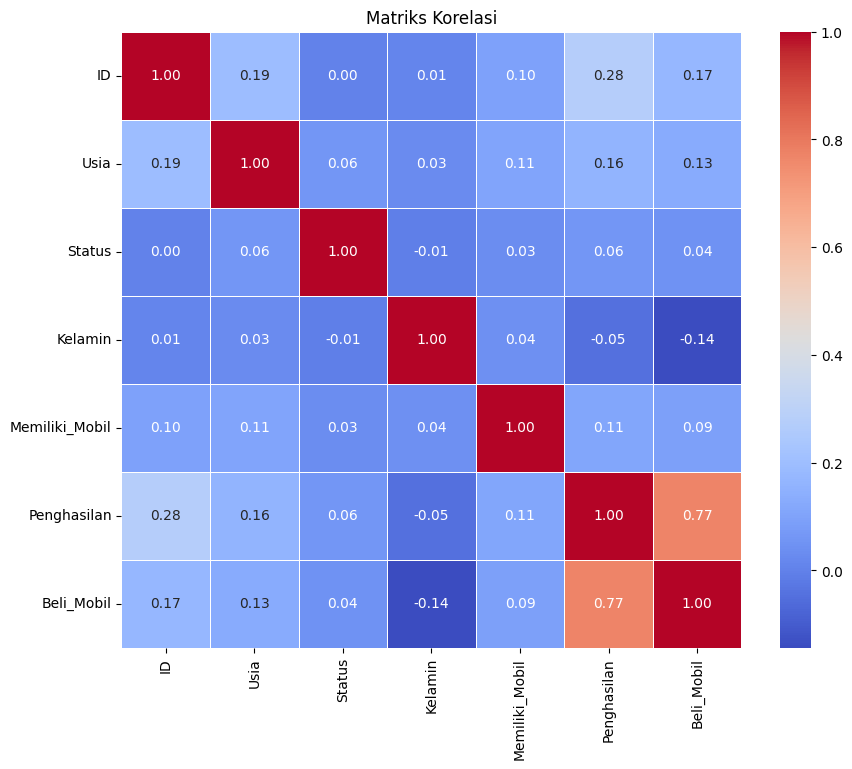

In [19]:
# Membuat matriks korelasi
corr_matrix = df.corr()

# Menampilkan matriks korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriks Korelasi')
plt.show()

Berdasarkan data diatas diambil lah Feature semua kolom kecuali kolom beli mobil

In [20]:
X = df.drop(['Beli_Mobil', 'ID', 'Usia', 'Memiliki_Mobil'], axis='columns')
y = df['Beli_Mobil']
X.columns

Index(['Status', 'Kelamin', 'Penghasilan'], dtype='object')

## MODELING


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = lm.LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
print(model.coef_)

[[-0.25377777 -1.00477052  0.0697218 ]]


## EVALUATE


In [24]:
y_prediksi = model.predict(X_test)
print(y_prediksi)

[1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1
 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0
 0 1 1 1 0 1 1 1 1 0 0 1 1]


In [25]:
def evaluateModel(y_true, y_pred):
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred)
    f1_score = metrics.f1_score(y_true, y_pred)
    
    # Specificity calculation
    tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    
    metrics_dict = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score,
        'Specificity': specificity
    }
    
    return metrics_dict


In [26]:
evaluateModel(y_test,y_prediksi)

{'Accuracy': 0.9393939393939394,
 'Precision': 0.9389312977099237,
 'Recall': 0.968503937007874,
 'F1 Score': 0.9534883720930233,
 'Specificity': 0.8873239436619719}

In [27]:
auc = metrics.roc_auc_score(y_test, y_prediksi)
auc

0.927913940334923

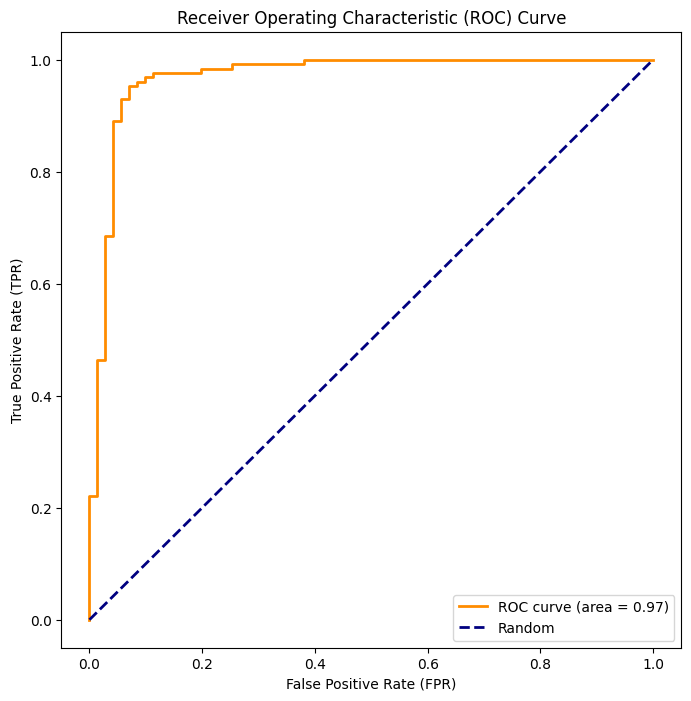

In [28]:
# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [29]:
rfe = feature_selection.RFE(model, n_features_to_select=3)
rfe = rfe.fit(X_train, y_train)
print('Support=', rfe.support_)
print('Ranking=', rfe.ranking_)

Support= [ True  True  True]
Ranking= [1 1 1]


In [30]:
def klasifikasiCalonPembeli(status, jk, penghasilan):
    prediksi = model.predict([[status, jk, penghasilan]])
    print([status, jk, penghasilan])
    return 'membeli mobil' if (prediksi == 1) else 'tidak membeli mobil'



In [31]:
klasifikasiCalonPembeli(1,1,200)

[1, 1, 200]


C:\Users\sabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'tidak membeli mobil'

## EXPORT MODEL


In [32]:
joblib.dump(model, 'model_calonpembelimobil.joblib')

['model_calonpembelimobil.joblib']

## IMPORT MODEL

In [33]:
loaded_model = joblib.load('model_calonpembelimobil.joblib')

In [34]:
loaded_model.predict([[1,1,500]])

C:\Users\sabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)